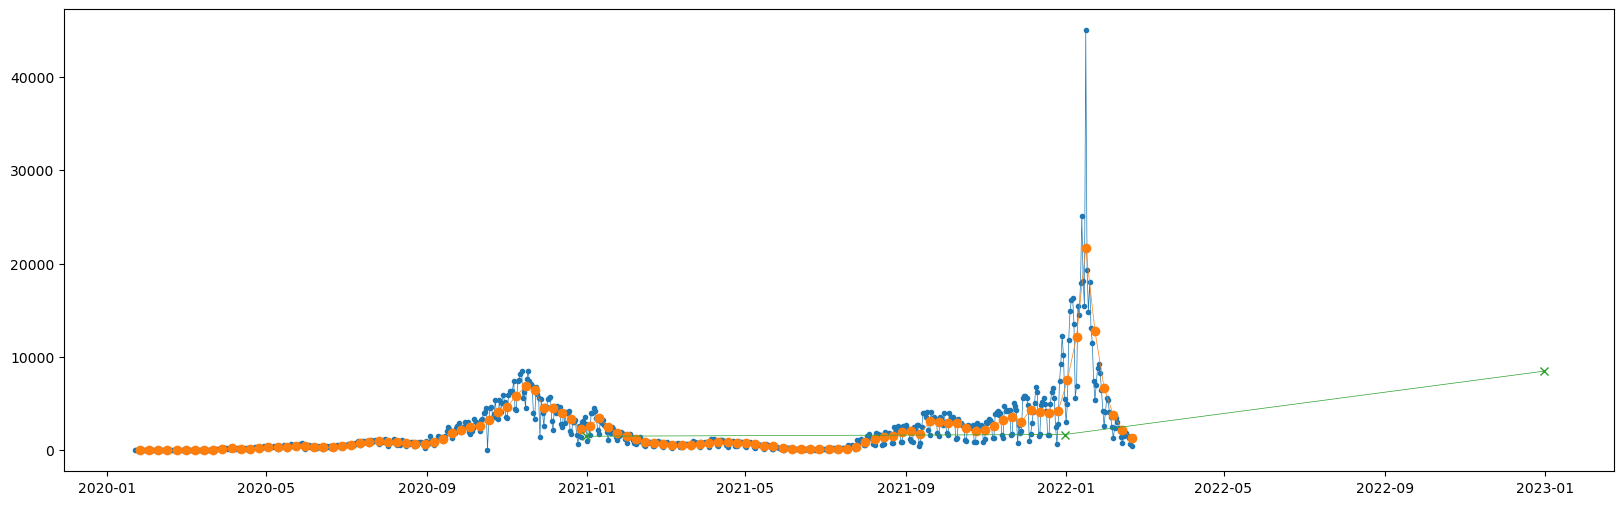

In [13]:
#Visualize time series data

import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv("COVID19-Historical-V2-ST.csv")
covid = covid[["Date", "POS_NEW_CP"]]

#plt.plot(covid["Date"], covid["POS_NEW_CP"], '-')

covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid.set_index('Date')


fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(covid.POS_NEW_CP, marker = '.', linestyle='-', linewidth = 0.5, label = 'daily')
ax.plot(covid.POS_NEW_CP.resample('W').mean(), marker = 'o', linestyle='-', linewidth = 0.5, label = 'Weekly')
ax.plot(covid.POS_NEW_CP.resample('Y').mean(), marker = 'x', linestyle='-', linewidth = 0.5, label = 'Yearly')

Date
2020-01-26        0.000000
2020-02-02        0.000000
2020-02-09        0.142857
2020-02-16        0.000000
2020-02-23        0.000000
                  ...     
2022-01-23    12789.000000
2022-01-30     6661.857143
2022-02-06     3786.142857
2022-02-13     2203.428571
2022-02-20     1318.285714
Freq: W-SUN, Name: POS_NEW_CP, Length: 109, dtype: float64

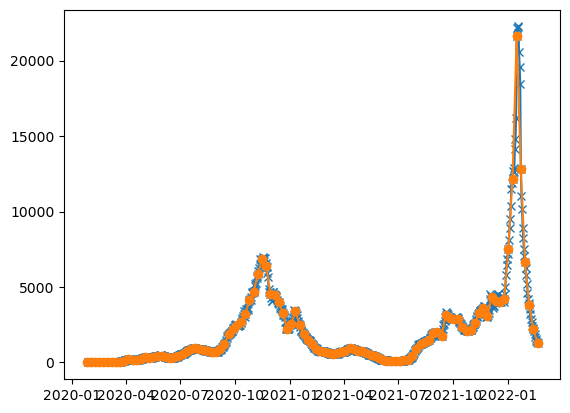

In [19]:
# simple moving average (SMA)
sma = covid.POS_NEW_CP.rolling(7).mean()
weeklymean = covid.POS_NEW_CP.resample('W').mean()
plt.plot(sma, marker = "x", linestyle = '-')
plt.plot(weeklymean, marker = "o", linestyle = '-')
weeklymean

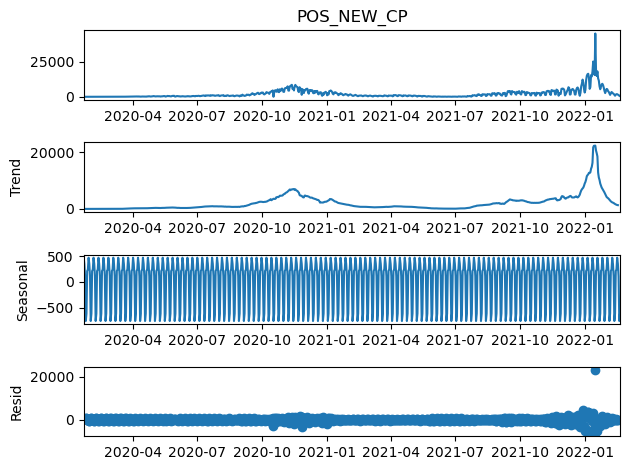

In [24]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(covid.POS_NEW_CP, model='additive', period=7)
fig = decomp.plot()

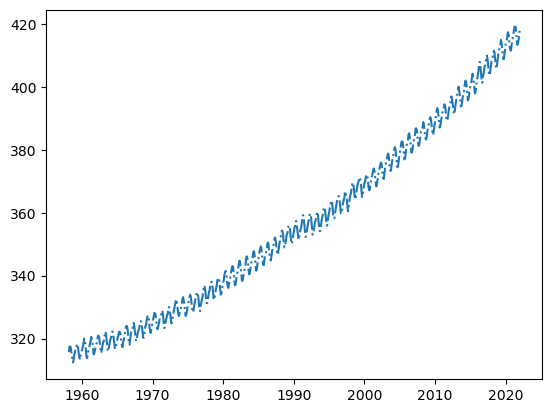

In [28]:
co2 = pd.read_csv("co2_mm_mlo.csv", parse_dates = {"date":["year", "month"]}, comment="#")
co2 = co2.set_index("date")

plt.plot(co2.average, "-.")

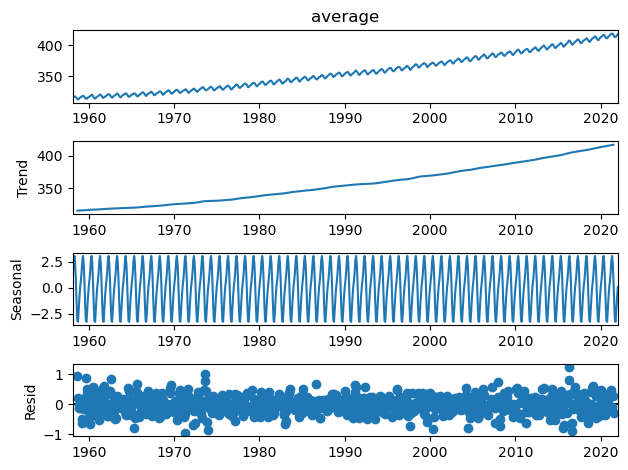

In [29]:
decomp = sm.tsa.seasonal_decompose(co2.average, model='additive', period=12)
fig = decomp.plot()

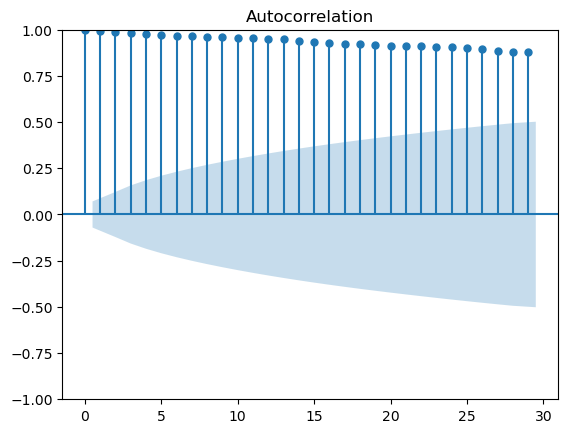

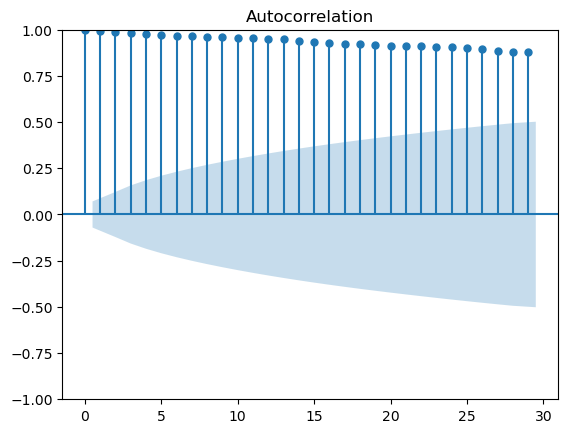

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(co2.average.values)

/Users/minchen/opt/anaconda3/envs/Thur/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/minchen/opt/anaconda3/envs/Thur/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


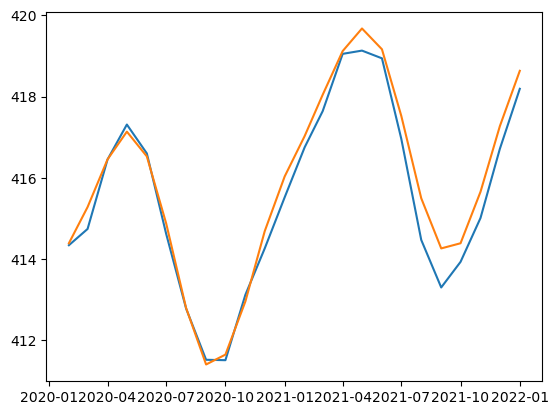

In [37]:
from statsmodels.tsa.ar_model import AutoReg

X = co2.average
train, test = X[1:len(X)-24], X[len(X)-24:]

# train the AR model
model = AutoReg(train, lags = 12)
model_fit = model.fit()
#print(model_fit.params)
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic = False)

plt.plot(test)
plt.plot(pred)